In [194]:
import pandas as pd
import numpy as np
import plotnine as pn
from plotnine import ggplot, aes, geom_col, theme, geom_point,scale_x_continuous ,scale_y_continuous
import math

In [195]:
def sigmoid_function(x):
    return 1 / (1+math.exp(-x))

## Make dummy data 
The size of someones balance ()

In [196]:
binary_data = pd.DataFrame(
    {"Defaulted": [0, 0, 0, 1, 0, 1, 0, 1, 1, 1], "Balance": np.arange(10)}
)
binary_data


,Defaulted,Balance
0,0,0
1,0,1
2,0,2
3,1,3
4,0,4
5,1,5
6,0,6
7,1,7
8,1,8
9,1,9


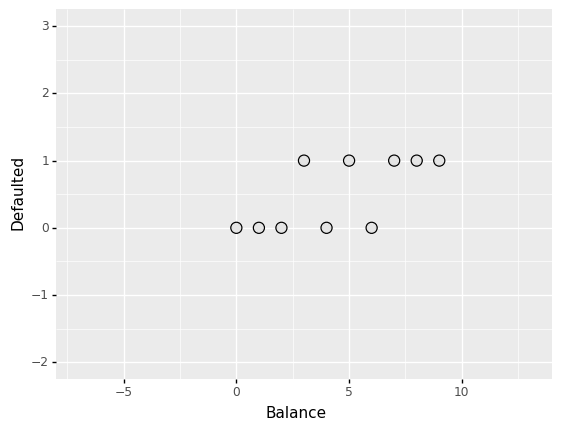

<ggplot: (317957364)>

In [197]:
(
    ggplot(data=binary_data, mapping=aes( "Balance","Defaulted"))
    + geom_point(color = 'black',size = 4)
    + geom_point(color="#e5e5e5",size = 3)
    + scale_x_continuous(limits=[-7, 13])
    + scale_y_continuous(limits=[-2, 3])
)


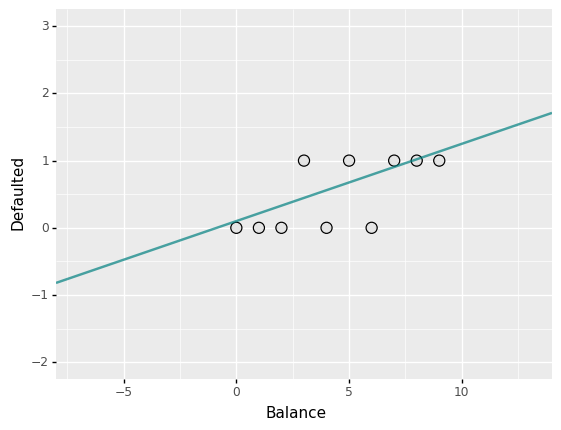

<ggplot: (318205328)>

In [198]:
(
    ggplot(data=binary_data, mapping=aes( "Balance","Defaulted"))
    + geom_point(color = 'black',size = 4)
    + geom_point(color="#e5e5e5",size = 3)
    # + pn.geom_smooth(method="lm", se=False, color="teal", alpha=0.8)
    + pn.geom_abline(slope=0.115,size = 1, intercept=0.1, color="teal", alpha=0.7)
    + scale_x_continuous(limits=[-7, 13])
    + scale_y_continuous(limits=[-2, 3])
)



\begin{align}
\mathop{\mathbb{E}(Y)} =0.1 + 0.115X
\end{align}  



Instead of thinking the the function of X (Balance) as the expected value of y (defaulting). Instead, think of it as a probability.  
In this case, we can chose a function that works better. Before we chose a linear function that fit our data best. (i.e, chosing beta1 and beta2)
\begin{align}
y_i = \beta_0 + \beta_1 x_i
\end{align}

Now, we choose another function, better suited for probabilities, the sigmoid function.

\begin{align}
f(x) =   \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }
\end{align}

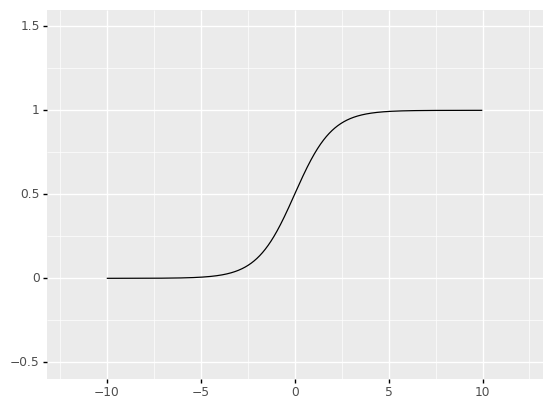

<ggplot: (316942628)>

In [200]:
(
    ggplot()+
    pn.geom_line(aes(np.arange(-10,10,0.01),list(map(sigmoid_function,np.arange(-10,10,0.01) )) ))
    + scale_x_continuous(limits=[-12, 12])
    + scale_y_continuous(limits=[-.5, 1.5])
)

We fit the sigmoid function to our data instead. 

In [203]:
binary_data = (
    binary_data
    .assign(
        linear_model=lambda df: 0.1 + 0.115 * df.Balance,
        )
        )
binary_data


,Defaulted,Balance,linear_model
0,0,0,0.100
1,0,1,0.215
2,0,2,0.330
3,1,3,0.445
4,0,4,0.560
5,1,5,0.675
6,0,6,0.790
7,1,7,0.905
8,1,8,1.020
9,1,9,1.135


/Users/ezracitron/Documents/repos/learning/explore/.venv/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 100 rows containing missing values.


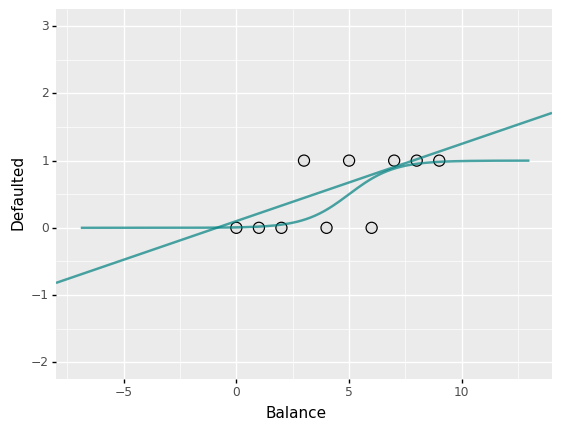

<ggplot: (316645923)>

In [205]:
(
    ggplot( mapping=aes("Balance", "Defaulted"))
    + geom_point(data = binary_data,color = 'black',size = 4)
    + geom_point(data = binary_data,color="#e5e5e5",size = 3)
    + pn.geom_line( 
        mapping=aes(
            np.arange(-10,20,0.1),
            list(map(lambda x: sigmoid_function(-5+x),np.arange(-10,20,0.1) )) ),
            size = 1, color="teal", alpha=0.7)
    + pn.geom_abline(slope=0.115,size = 1, intercept=0.1, color="teal", alpha=0.7)

    + scale_x_continuous(limits=[-7, 13])
    + scale_y_continuous(limits=[-2, 3])
)

$p(Y=1|X) = \frac{\mathrm{1} }{\mathrm{1} + e^{-(\beta_0+\beta_1X)} }$





Before we could say that a unit increase in $X$ causes an increase in $\mathop{\mathbb{E}(Y)}$ by $\beta_1$ units. Now, since we are not using a linear function in $X$, the amount that the probability increases depends on the value of $X$, we could differentiate to find the exact amount. 
With out sigmoid function, a unit increase in $X$ causes a $\frac{d}{dx}( \frac{\mathrm{1} }{\mathrm{1} + e^{-x} })$ change in probability of getting a $Y=1$


however, simple algebra gives 
$$
p(x) = \frac{e^{(\beta_0+\beta_1X)} }{\mathrm{1} + e^{(\beta_0+\beta_1X)}}
$$

$$
p(x)(1 + e^{(\beta_0+\beta_1X)})  = e^{\beta_0+\beta_1X}
$$

$$
 p(x) + p(x)e^{(\beta_0+\beta_1X)} - e^{\beta_0+\beta_1X} = 0 
$$

$$
 e^{\beta_0+\beta_1X}(p(x)-1)  = p(x) 
$$

$$
e^{(\beta_0+\beta_1X)}  = \frac{p(x)}{p(x)-1} 
$$

So a unit increase in $X$ causes a $e^{\beta_1}$ increase in, not the probability, but the _odds_!

Going one step further...

$$
{\beta_0+\beta_1X}  = log_e(\frac{p(x)}{p(x)-1} )
$$

A unit increase in $X$ increases the log of the odds by one unit.